# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:mediumaquamarine;overflow:hidden"><b>H DIP IN DATA ANALYTICS FOR BUSINESS (FT)</b></div>

<a id="1.1"></a>
<h2 style="font-family:arial;text-align:center; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none;color:mediumaquamarine; background-color: #ffffff;"> <b>STATISTICAL TECHNIQUES FOR DATA ANALYSIS</b></h2>

ASSESSMENT TITLE: CA2

LECTURER NAME: JOHN O’SULLIVAN

STUDENT FULL NAME: BÁRBARA ABREU COSTA

STUDENT NUMBER: 2023099

ASSESSMENT DUE DATE: FRIDAY, 28TH OF APRIL 2023

DATE OF SUBMISSION: MONDAY, 22TH OF MAY 2023</b> </h2> 

------------------------------------------------------------------

    Before start running the codes, we need do make sure we have the necessary libraries installed.

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
!pip install pydataset

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:mediumaquamarine;overflow:hidden"><b>TASK 1</b></div>

##### Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

    We can load the dataset calling the function .read_csv()

In [3]:
df = pd.read_csv('Q1.csv')

    The .head() function show us the five first rows in our dataset

In [4]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


##### a. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.

    To calculates summary statistics we use .describe()

In [5]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


In [6]:
df.median()

exam_score    68.39
dtype: float64

> As we can notice, our mean (68.73) and median (68.39) are close in value, it indicates that the distribution of the 'exam_score' is relatively symmetric or close to a normal distribution without significant skewness or extreme outliers.

    To produce an appropriate plot to summarise the dataset we'll first create a dictionary of the summary statistics

In [7]:
summary_stats = {
    'count': 50.000000,
    'mean': 68.735600,
    'std': 9.750143,
    'min': 48.730000,
    '25%': 62.040000,
    '50%': 68.390000,
    '75%': 74.630000,
    'max': 87.360000
}

    Now, we can create a bar plot of the summary statistics

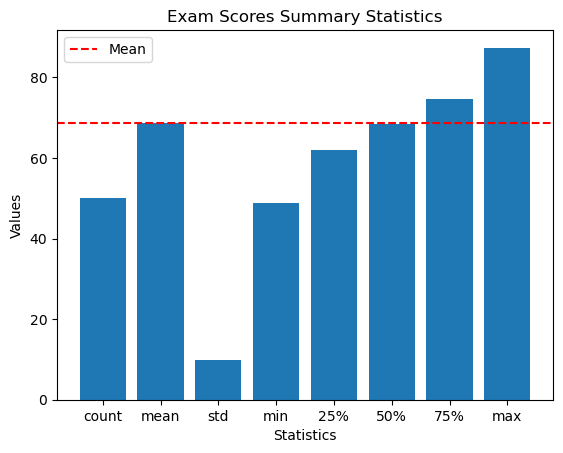

In [8]:
fig, ax = plt.subplots()
ax.axhline(y=summary_stats['mean'], color='red', linestyle='--', label='Mean')
ax.bar(summary_stats.keys(), summary_stats.values())
plt.title('Exam Scores Summary Statistics')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.legend(loc='best')
plt.show()

> Based on the summary statistics, we can conclude that the students average exam score is around 68.74% (mean), with a moderate amount of variability of 9.75 (standard deviation). The majority of the students scores fall within the range of approximately 62% to 75%, as indicated by the interquartile range (Q1 to Q3). The minimum and maximum scores show that the dataset covers a range of performance levels, with the lowest score at 48.73% and the highest score at 87.36%.

    We can also generates a histogram of the exam scores, for that we gonna use Matplotlib's .hist()

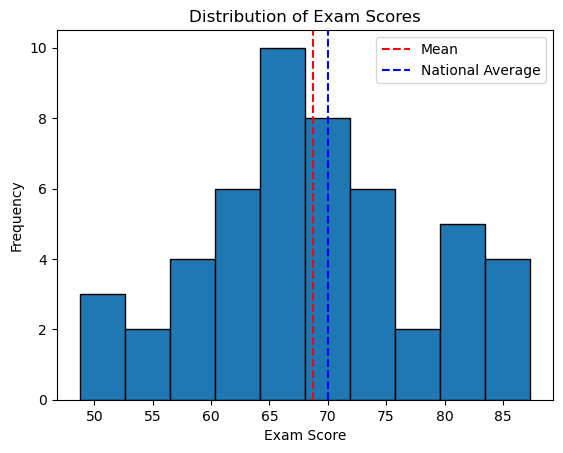

In [9]:
import matplotlib.pyplot as plt

# Histogram plot
plt.hist(df['exam_score'], bins=10, edgecolor='black')

# Calculate and plot the mean
mean_score = df['exam_score'].mean()
plt.axvline(x=mean_score, color='red', linestyle='--', label='Mean')

# Plot the national average
national_average = 70
plt.axvline(x=national_average, color='blue', linestyle='--', label='National Average')

# Customize the plot
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.legend()
plt.show()


> The plot above provides an overview of the distribution of exam scores. It allows us to visualize how the scores are spread across different ranges, by looking it we can observe the frequency in each one.
> The red dashed line represents the MEANS score of the exam scores that is a measure of central tendency that gives an indication of the average score. By plotting the mean on the histogram, you can see how it relates to the overall distribution. The blue dashed line represents the NATIONAL AVERAGE score, which is set at 70. This line provides a reference point for comparison purposes.

In [10]:
df.skew()

exam_score    0.014452
dtype: float64

[Text(0.5, 0, 'Exam Score'), Text(0, 0.5, 'Number of Scores')]

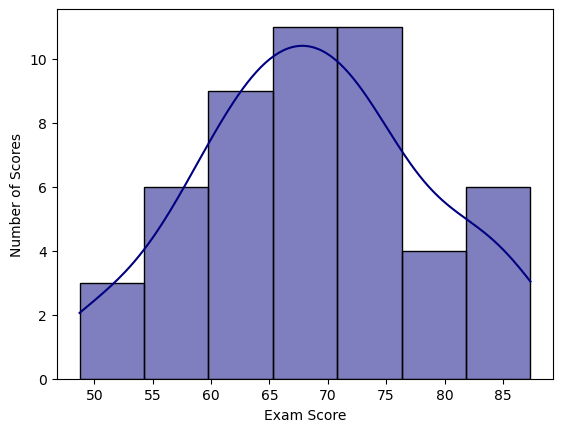

In [11]:
ax = sns.histplot(df.exam_score, bins=7, kde=True, color='navy')
ax.set(xlabel='Exam Score',
       ylabel='Number of Scores')

> These findings suggest that there is some variation in student performance on the exam, with some students receiving better scores than others. A visual representation of the distribution may be seen in the histogram, which can be used to identify any patterns or outliers in the sample.

    We can also produce a box plot, that shows us the data distribution is symmetric.

<AxesSubplot:>

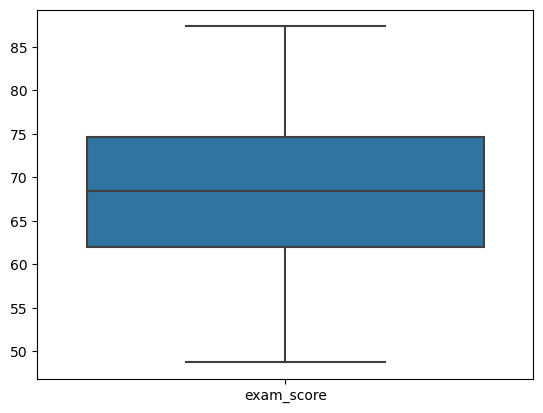

In [12]:
sns.boxplot(data=df)

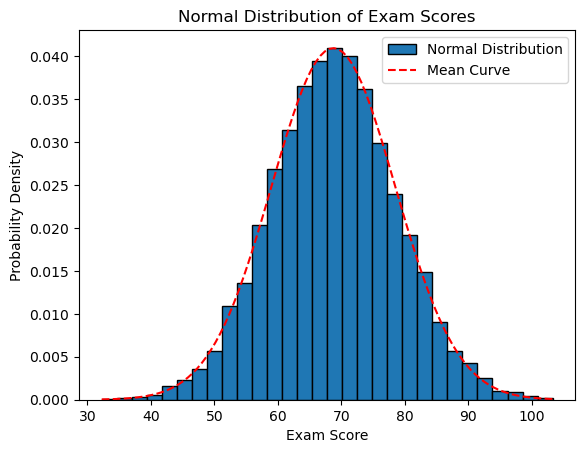

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Summary statistics
mean = 68.735600
std = 9.750143

# Generate normal distribution data
data = np.random.normal(mean, std, 10000)

# Plot the normal distribution
plt.hist(data, bins=30, edgecolor='black', density=True, label='Normal Distribution')
plt.xlabel('Exam Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Exam Scores')

# Calculate and plot the mean curve
x = np.linspace(data.min(), data.max(), 100)
y = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
plt.plot(x, y, color='red', linestyle='--', label='Mean Curve')

plt.legend()
plt.show()


> The histogram represents the distribution of scores, with the x-axis representing the scores and the y-axis representing the probability density. The red dashed line shows the theoretical normal distribution curve based on the mean (68.735600) and standard deviation (9.750143). The curve is centered around the mean and follows a bell-shaped pattern. Overall, the plot visualizes the distribution of exam scores, with the majority of scores concentrated around the mean and the curve providing an approximation of the expected distribution based on the Summary statistics.

##### b. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? 

##### Use a significance level of alpha = 0.05.

    To determine whether the concerns of the teacher about the students' performance being below the reported national average of 70% are justified, a hypothesis test can be conducted. Based on the dataset, we have the mean score of the exam as 68.735600. To test the hypothesis, we can perform a one-sample t-test comparing the mean score to the national average.
    
##### Where: 

    H0 - null hypothesis is that the mean score of the students is EQUAL to OR GREATER than the national average (μ >= 70). 
    H1 - alternative hypothesis is that the mean score is LESS than the national average (μ < 70).

##### If:
    
    The p-value of the test is less than the significance level (alpha), we reject the null hypothesis, indicating evidence to support the alternative hypothesis.
    

    Now, to calculate the t-statistic and p-value for the one-sample t-test we need to import SciPy library

In [14]:
import scipy.stats as stats

    Next we set the significance level

In [15]:
alpha = 0.05

    And the hypotheses

In [16]:
H0 = 70
Ha = 70

    Perform one-sample t-test

In [17]:
t_statistic, p_value = stats.ttest_1samp(df['exam_score'], H0)

    Thus we got the following results:

In [18]:
t_statistic

-0.9169771399834613

In [19]:
p_value

0.36364597032062806

    To compare p-value with significance level we use the conditional statement

In [20]:
if p_value < alpha:
    print("The null hypothesis is rejected.")
    print("The average exam score of the students is significantly below the national average of 70%.")
else:
    print("The null hypothesis is not rejected.")
    print("The average exam score of the students is not significantly below the national average of 70%.")

The null hypothesis is not rejected.
The average exam score of the students is not significantly below the national average of 70%.


###### Comment:

> When the null hypothesis is not rejected, it signifies that there is insufficient data to support a conclusion that the students' average exam scores are significantly below the national average of 70%. In other words, we are unable to conclude with certainty that the performance of the students in the school is lower than the reported national average based on the dataset provided and the statistical analysis performed.

> The p-value obtained from the one-sample t-test is GREATER than the significance level (alpha) of 0.05. This suggests that the observed difference between the average exam score and the national average of 70% could be due to random variation or sampling error. Therefore, we don't have sufficient evidence to support the teacher's concern that the students' performance is below the national average.

> It's important to keep in mind, though, that statistical significance does not always reflect practical relevance. Even though the statistical test may not show a significant difference, further investigation and evaluation of other aspects may be helpful to comprehend the students' performance in more detail.

##### c. Produce and comment on an appropriate plot to illustrate your findings.

    Calculating the average exam score and national_average

In [21]:
mu = 70
data = df['exam_score']

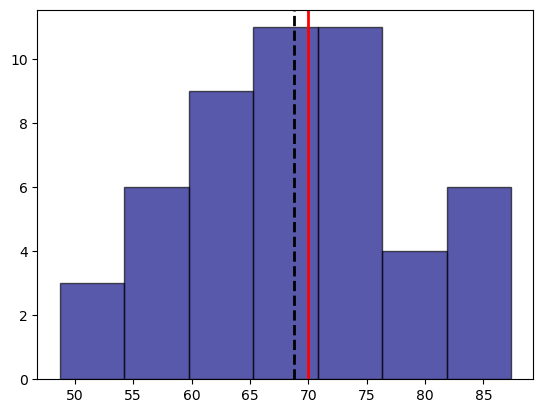

In [22]:
import matplotlib.pyplot as plt
result = plt.hist(data, bins=7, color='navy', edgecolor='k', alpha=0.65)
plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(mu, color='red', linestyle='solid',linewidth=2);

> The histogram plot represents the distribution of exam scores, providing insights into how the scores are spread across different ranges. The mean score, represented by the **dashed black line**, serves as an average performance indicator based on the available data. By comparing the sample mean to the known performance in the Dublin secondary school, we can assess how the average score obtained from the sample aligns with the overall performance of the students in that specific school. If the sample mean is close to the known performance, it suggests that the sample is a representative subset of the student population from that school.

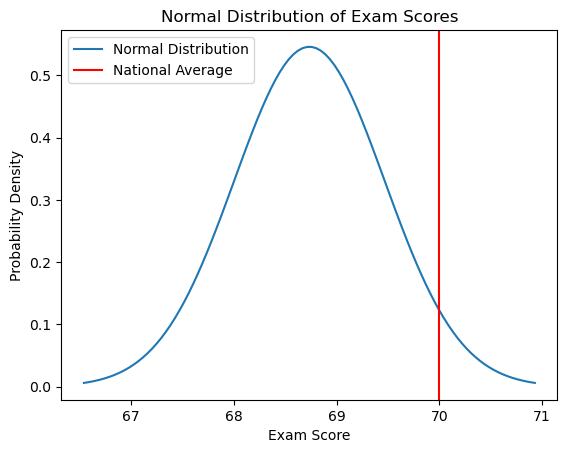

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

t_statistic = -0.9169771399834613
p_value = 0.36364597032062806
mean = 68.7356
median = 68.39
national_average = 70

# Calculate the standard deviation using the mean and median
std = (mean - median) / norm.ppf(0.5 + p_value / 2)

# Create an x array of values to evaluate the normal distribution
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)

# Generate the normal distribution with the calculated mean and standard deviation
dist = norm(loc=mean, scale=std)

# Plot the normal distribution pdf
plt.plot(x, dist.pdf(x), label='Normal Distribution')

# Plot a vertical line at the national average value
plt.axvline(national_average, color='red', label='National Average')

plt.xlabel('Exam Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Exam Scores')
plt.legend()
plt.show()


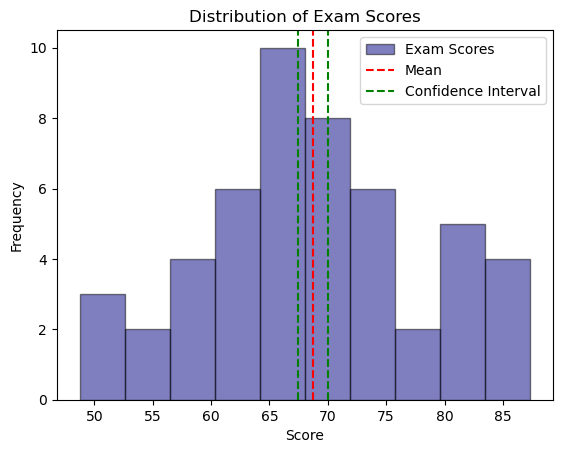

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Data
mean = 68.735600
std = 9.750143
mu = 70
data = df['exam_score']

# Plotting
plt.hist(data, bins=10, edgecolor='black', alpha=0.5, label='Exam Scores', color='navy')

# Confidence interval boundaries
ci_lower = mean - (std / np.sqrt(len(data))) * t_statistic
ci_upper = mean + (std / np.sqrt(len(data))) * t_statistic

# Plotting mean and confidence interval
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(ci_lower, color='g', linestyle='--', label='Confidence Interval')
plt.axvline(ci_upper, color='g', linestyle='--')

# Plot customization
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.legend()

# Display the plot
plt.show()


------------------------------------------------------------------

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:mediumaquamarine;overflow:hidden"><b>TASK 2</b></div>

##### Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

In [25]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')

In [26]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##### a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.

In [27]:
diamonds['colourless'] = (diamonds['color'].isin(['D', 'E', 'F'])).astype(int)

In [28]:
print(diamonds.head(5))

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

   colourless  
0           1  
1           1  
2           1  
3           0  
4           0  


    The .isin() function checks if the value of the "color" column is in the list ['D', 'E', 'F']. The result is a boolean Series with True where the value is in the list and False otherwise. So than we use the .astype() function to convert the boolean values to integers, with 'True' being converted to 1 and 'False' to 0. Finally, we assign this Series to a new column called "colourless" in the diamonds dataframe.

##### b. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01

    To determine whether there is an association between the clarity of a diamond and whether it is colorless or not, 
    we can perform a chi-squared test of independence. This test will help assess whether there is a significant
    relationship between two categorical variables.

    First step we import the necessary libraries

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

    Next we can create a contingency table

In [30]:
contingency_table = pd.crosstab(diamonds['clarity'], diamonds['colourless'])

     Performing the chi-squared test

In [31]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    Set the significance level

In [32]:
alpha = 0.01

    Check the p-value against the significance level

In [33]:
if p_val < alpha:
    print("Reject the null hypothesis. There is evidence of an association between clarity and colourless.")
else:
    print("Fail to reject the null hypothesis. There is insufficient evidence of an association between clarity and colourless.")

Reject the null hypothesis. There is evidence of an association between clarity and colourless.


##### c. Produce and comment on an appropriate plot to illustrate your findings.

   colourless clarity  value
0          No      I1    454
1         Yes      I1    287
2          No      IF   1174
3         Yes      IF    616
4          No     SI1   6425
5         Yes     SI1   6640
6          No     SI2   4502
7         Yes     SI2   4692
8          No     VS1   4821
9         Yes     VS1   3350
10         No     VS2   5890
11        Yes     VS2   6368
12         No    VVS1   2013
13        Yes    VVS1   1624
14         No    VVS2   2547
15        Yes    VVS2   2519


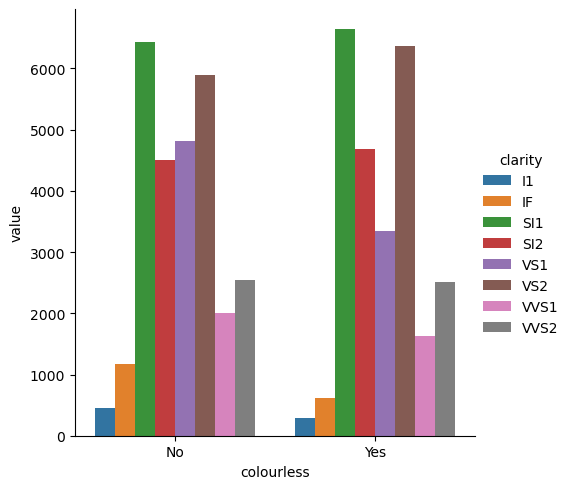

In [34]:
# Making a plot of the two-way table:
import seaborn as sns

dfs = pd.DataFrame(data={'colourless': ['No','Yes'], 
                         'I1': [454, 287], 
                         'IF': [1174, 616], 
                         'SI1':[6425, 6640],
                         'SI2':[4502, 4692],
                         'VS1': [4821, 3350],
                         'VS2': [5890, 6368],
                        'VVS1':[2013, 1624],
                       'VVS2':[2547, 2519]})

# Melt the dataframe:
dfs1 = pd.melt(dfs, id_vars = "colourless")
dfs1 = dfs1.rename(columns={"variable": "clarity"})

print(dfs1)

sns.catplot(x = 'colourless', y='value', 
               hue = 'clarity',data=dfs1, kind='bar')
plt.show()

> In this analysis, we explored the relationship between diamond clarity and colorlessness using a two-way table and a bar plot. The clarity of diamonds was measured on a scale from "I1" (worst) to "IF" (best), with several intermediate levels including "SI2," "SI1," "VS2," "VS1," "VVS2," and "VVS1." The data was organized in a tidy format, with each row representing a combination of clarity and a binary indicator of colorlessness ("Yes" or "No"). The "value" column indicated the count of diamonds in each clarity category for both colorless and non-colorless diamonds.

> By examining the bar plot, we gained valuable insights into the distribution of diamond clarity among colorless and non-colorless diamonds. The plot displayed the "colorless" category on the x-axis and the count of diamonds on the y-axis. Each clarity category was represented by a different color. Notably, the clarity category "SI1" had the highest count for both colorless and non-colorless diamonds.

##### d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non-colourless diamonds.

    Import the necessary libraries

In [35]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

    Define the subsets for colorless and non-colorless diamonds

In [36]:
colourless_diamonds = diamonds[diamonds['color'].isin(['D', 'E', 'F'])]
non_colourless_diamonds = diamonds[diamonds['color'].isin(['G', 'H', 'I', 'J'])]

    Calculate the sample mean and standard deviation for the price of colorless diamonds

In [37]:
mean_colourless = colourless_diamonds['price'].mean()
std_colourless = colourless_diamonds['price'].std()

    Calculate the mean and standard deviation for the price of non-colourless diamonds

In [38]:
mean_non_colourless = non_colourless_diamonds['price'].mean()
std_non_colourless = non_colourless_diamonds['price'].std()

    Calculate the 90% confidence intervals using the stats.t.interval() function:

In [39]:
alpha = 0.1  # 90% confidence level
n_colourless = len(colourless_diamonds)
n_non_colourless = len(non_colourless_diamonds)

ci_colourless = stats.t.interval(alpha, df=n_colourless - 1, loc=mean_colourless, scale=std_colourless / (n_colourless ** 0.5))
ci_non_colourless = stats.t.interval(alpha, df=n_non_colourless - 1, loc=mean_non_colourless, scale=std_non_colourless / (n_non_colourless ** 0.5))

    Calculate the mean and standard deviation for the price of colourless diamonds

    The stats.t.interval() function calculates the confidence interval based on the t-distribution. The degrees of freedom are calculated as n - 1, where n is the sample size.

In [40]:
print("90% Confidence Interval for the Mean Price of Colourless Diamonds:", ci_colourless)
print("90% Confidence Interval for the Mean Price of Non-Colourless Diamonds:", ci_non_colourless)

90% Confidence Interval for the Mean Price of Colourless Diamonds: (3335.01668708603, 3340.5021150890484)
90% Confidence Interval for the Mean Price of Non-Colourless Diamonds: (4487.986959024278, 4494.473186163676)



> The 90% confidence interval for the mean price of colourless diamonds represents the range of values within which we can be 90% confident that the true mean price of all colourless diamonds lies. Similarly, the 90% confidence interval for the mean price of non-colourless diamonds represents the range of values within which we can be 90% confident that the true mean price of all non-colourless diamonds lies.

> For example, the 90% CI for the Mean Price of Colourless Diamonds (3335.01668708603, 3340.5021150890484). This means that we can be 90% confident that the true mean price of all colourless diamonds falls between 3335.01 and 3340.50. 

> Similarly, the 90% CI for the Mean Price of Non-Colourless Diamonds represents the range of values within which we can be 90% confident that the true mean price of all non-colourless diamonds lies.

> **Note:** The confidence intervals assume that the sample data is representative of the population and that the data follows a normal

------------------------------------------------------------------

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:mediumaquamarine;overflow:hidden"><b>TASK 3</b></div>

##### Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.

    First of all import the required libraries and load the dataset

In [41]:
from pydataset import data
df = data('PlantGrowth')

##### a. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.

In [42]:
df.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


    Findind out the size of the data

In [43]:
df.shape

(30, 2)

    Calculating the summary statistics by treatment

In [44]:
summary_stats = df.groupby('group')['weight'].describe()

In [45]:
print(summary_stats)

       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


> This shows that the mean weight for each treatment group is 5.032, 4.661, and 5.526 for the control, trt1, and trt2 groups respectively. We can also see that the standard deviation of the weights in each group differs, with trt1 having the largest standard deviation.

    To create an appropriate plot to summarize the dataset we need first import Seaborn

<AxesSubplot:xlabel='group', ylabel='weight'>

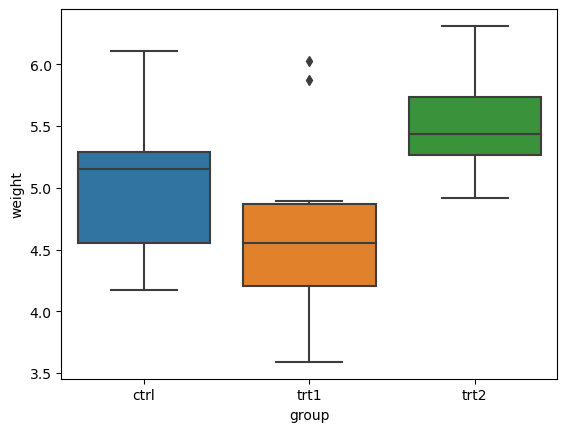

In [46]:
import seaborn as sns
sns.boxplot(data=df, x='group', y='weight')

> The boxplot function from the seaborn library creates a box plot to visualize the distribution of weights for each treatment group. The control group has a larger median weight than the other two treatment groups, it is clear from the plot analysis. This implies that the control group had a larger weight measurement overall.
> In addition, we see that the trt1 group has a wider interquartile range than the other two groups (the space between the 25th and 75th percentiles). This suggests that the trt1 group's weights are more inconsistent than those in the other treatment groups.
> The box plot also illustrates that each group has assimetric distribuition as we visualize in the tails. Notably, the position of the top whisker in the trt2 group indicates that it has the highest maximal weight.

##### b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.

##### Where:

    H0 - null hypothesis is that the mean score of the students is EQUAL to OR GREATER than the national average (μ >= 70). 
    H1 - alternative hypothesis is that the mean score is LESS than the national average (μ < 70).

    Create a function to glimpse the data

In [47]:
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

    Import package

In [48]:
from pydataset import data

    Divide into three groups

In [49]:
df1 = df[df['group'] == 'ctrl']
df2 = df[df['group'] == 'trt1']
df3 = df[df['group'] == 'trt2']

    Call the glimpse function for each group

In [50]:
print()
print("\033[1m---- GROUP CONTROL:\033[0m", end=' ')
glimpse(df1)
print()

print("\033[1m---- TREATMENT 1: \033[0m", end=' ')
glimpse(df2)
print()

print("\033[1m---- TREATMENT 2: \033[0m", end=' ')
glimpse(df3)


---- GROUP CONTROL: 10 rows and 2 columns


,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


,weight,group
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl
9,5.33,ctrl
10,5.14,ctrl



---- TREATMENT 1:  10 rows and 2 columns


,weight,group
11,4.81,trt1
12,4.17,trt1
13,4.41,trt1
14,3.59,trt1
15,5.87,trt1


,weight,group
16,3.83,trt1
17,6.03,trt1
18,4.89,trt1
19,4.32,trt1
20,4.69,trt1



---- TREATMENT 2:  10 rows and 2 columns


,weight,group
21,6.31,trt2
22,5.12,trt2
23,5.54,trt2
24,5.50,trt2
25,5.37,trt2


,weight,group
26,5.29,trt2
27,4.92,trt2
28,6.15,trt2
29,5.80,trt2
30,5.26,trt2


    Perform one-way ANOVA

In [51]:
result = stats.f_oneway(df1['weight'][df1['group'] == 'ctrl'],
                        df2['weight'][df2['group'] == 'trt1'],
                        df3['weight'][df3['group'] == 'trt2'])

    Print the result

In [52]:
print("One-way ANOVA results:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

One-way ANOVA results:
F-statistic: 4.846087862380136
p-value: 0.0159099583256229


    A plot to see why we have rejected 𝐻0

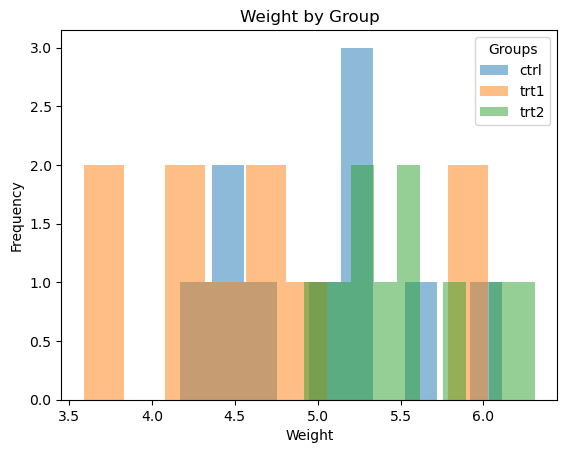

In [53]:
# Add three histograms to one plot
plt.hist(df1['weight'], alpha=0.5, label='ctrl')
plt.hist(df2['weight'], alpha=0.5, label='trt1')
plt.hist(df3['weight'], alpha=0.5, label='trt2')

# Add plot title and axis labels
plt.title('Weight by Group')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Groups')

# Display plot
plt.show()

> The results of the one-way ANOVA test indicate that there is evidence to suggest a statistically significant difference between at least one of the group means (control and two treatments) in the PlantGrowth dataset. The calculated F-statistic of 4.846087862380136 indicates a meaningful difference between the group means relative to the variability within each group. Additionally, the p-value of 0.0159099583256229, which is smaller than the predetermined significance level of 0.05, provides strong evidence against the null hypothesis. Therefore, we can conclude that there is a significant difference in the means of the groups, suggesting an effect of the treatments on the plant growth.

##### c. If there is evidence of a difference between the three means, find and comment on where this difference may be

In [54]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

    Perform Tukey-Kramer Analysis:

In [55]:
tukey = pairwise_tukeyhsd(endog=df['weight'],
                          groups=df['group'],
                          alpha=0.05)

    Display results

In [56]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


> Based on the results of the Tukey's HSD test with a family-wise error rate of 0.05, we can determine the presence or absence of significant differences between the three means (control and two treatments) in the PlantGrowth dataset.
> The comparison between the control group (ctrl) and treatment 1 (trt1) does not show a statistically significant difference (p-adj = 0.3909), indicating that the mean values of these groups are not significantly different.
> Similarly, the comparison between the control group (ctrl) and treatment 2 (trt2) also does not reveal a significant difference (p-adj = 0.198), suggesting that there is no meaningful distinction between the mean values of these groups.
> However, when comparing treatment 1 (trt1) and treatment 2 (trt2), there is strong evidence of a significant difference (p-adj = 0.012), implying that the mean values of these groups are significantly different.
> In summary, based on the Tukey's HSD test, we can conclude that there is a significant difference between the means of treatment 1 (trt1) and treatment 2 (trt2). However, there is no significant difference observed between the control group (ctrl) and either of the treatment groups (trt1 and trt2).








------------------------------------------------------------------

# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:arial;text-align:center;display:fill;border-radius:5px;background-color:mediumaquamarine;overflow:hidden"><b>TASK 4</b></div>

##### Load the trees dataset from the pydataset library. It contains measurements of the diameter, height and volume of timber in 31 felled black cherry trees. Note that the diameter (in inches) is labelled girth in the dataset. It is measured at 4 foot 6 inches above the ground.

    Loading the dataset: 

In [57]:
from pydataset import data
trees = data('trees')

In [58]:
trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


##### a. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library).

    Import the required libraries:

In [59]:
import pandas as pd
from scipy.stats import pearsonr

    Now, let's perform a correlation analysis between all numerical variables using the .corr()

In [60]:
corr_matrix = trees.corr()
print(corr_matrix)

           Girth   Height    Volume
Girth   1.000000  0.51928  0.967119
Height  0.519280  1.00000  0.598250
Volume  0.967119  0.59825  1.000000


> Knowing that the correlation coefficient ranges from -1 to 1, where values ​​closer to 1 indicate a strong positive relationship, values ​​closer to -1 indicate a strong negative relationship, and values ​​close to 0 indicate a weak relationship or no relationship.

So we can conclude that the correlation matrix reveals:

> * <u>Girth and Volume</u> have a strong positive correlation of 0.967, indicating that as the girth of a tree increases, its volume also tends to increase proportionally. This suggests that girth can be a reliable predictor of tree volume.
   
> * <u>Height and Volume</u> have a moderate positive correlation of 0.598, suggesting that as the height of a tree increases, its volume also tends to increase, albeit to a lesser extent compared to the relationship between girth and volume.
   
> * <u>Girth and Height</u> have a moderate positive correlation of 0.519, implying that there is some association between the girth and height of trees, but the relationship is not as strong as the correlation between girth and volume or height and volume.

    Now, let's perform hypothesis tests for the population correlation coefficients between all three pairs of variables using the .pearsonr() function from the scipy.stats library.

In [61]:
r_gv, p_gv = pearsonr(trees['Girth'], trees['Volume'])
r_gh, p_gh = pearsonr(trees['Girth'], trees['Height'])
r_hv, p_hv = pearsonr(trees['Height'], trees['Volume'])

print(f"Correlation coefficient between Girth and Volume: {r_gv:.4f}, p-value: {p_gv:.4f}")
print(f"Correlation coefficient between Girth and Height: {r_gh:.4f}, p-value: {p_gh:.4f}")
print(f"Correlation coefficient between Height and Volume: {r_hv:.4f}, p-value: {p_hv:.4f}")

Correlation coefficient between Girth and Volume: 0.9671, p-value: 0.0000
Correlation coefficient between Girth and Height: 0.5193, p-value: 0.0028
Correlation coefficient between Height and Volume: 0.5982, p-value: 0.0004


> We can see that all three correlation coefficients are statistically significant at the 0.05 level (p-values < 0.05), indicating that there is strong evidence of linear association between each pair of variables. Specifically, the high correlation coefficient between *Girth and Volume* suggests that the diameter of the tree is a good predictor of its <u>volume</u>, while the moderate correlation coefficient between *Height and Volume* suggests that the <u>height</u> of the tree is also a reasonable predictor of its volume.

##### b. There is interest in estimating the volume of timber from trees using either the girth or the height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings.

    Performing a regression analysis using the variables Girth and Height as predictors and Volume as the target variable. This will help to determine the relationship between the predictors and the target variable and evaluate their effectiveness in predicting the volume of timber.

    Import the required libraries:

In [62]:
import statsmodels.api as sm

    Add a constant term for the intercept

In [63]:
X = sm.add_constant(trees[['Girth', 'Height']])
y = trees['Volume']

    Fiting the multiple linear regression model

In [64]:
model = sm.OLS(y, X).fit()

    Printing the model summary

In [65]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.07e-18
Time:                        18:07:51   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.9877      8.638     -6.713      0.0

    
> The regression model demonstrates a strong relationship between the predictors (Girth and Height) and the dependent variable (Volume). The coefficients indicate that both *Girth and Height* have a positive impact on the volume, with *Girth* having a larger effect. The model as a whole is statistically significant, suggesting that the predictors jointly contribute to explaining the variation in the *Volume*. 
    
> * <u>Significance of coefficients:</u> Both the coefficient estimates for Girth and Height are statistically significant (p < 0.05), indicating that these variables have a significant impact on the volume of timber. In other words, changes in girth and height are associated with changes in the volume of timber, and these relationships are not likely due to chance.

> * <u>Interactions between variables:</u> The positive correlation between Girth and Volume suggests that as the girth of a tree increases, its volume tends to increase as well. Similarly, the positive correlation between Height and Volume indicates that taller trees generally have larger volumes. The moderate positive correlation between Girth and Height suggests that as the girth of a tree increases, its height tends to increase, although the relationship is not as strong as the correlations with volume.

> Overall, these findings demonstrate the interplay between girth, height, and volume in determining the size of timber trees.